#**FACTORS AFFECTING HOUSING PRICES**


**a) Data Analytic Questions**

Which factors affect housing prices  given information on real estate properties that was collected over the past few months.

**b) Success Metrics**

* Sucessful Exploratory Data Analysis.
* Sucessful feature engineering.
* Sucessful check of multicollinearity.
* Sucessful Multiple Linear Regression.
* Sucessful Lasso Regression
* Sucessful Ridge Regression
* Sucessful Elastic Net Regression
* Sucessful Elastic Quantile Regression
* Sucessful Cross-validation of the Alpha value.
* Sucessful Computation of MSE on all models.
* Creation  of residual plots for the linear base line model.
* Sucessful assessment their heteroscedasticity.

**c) context**

The aim of this project is to predict factors affect housing prices  given information on real estate properties, the analyst will perform;
* Feature transformation and dimensionality reduction techniques so as to increase the quality of the feature space. 
* Compare multiple reggression and choose the one that performs best. 

**d) Experimental Design**

* Formulation of the research question.
* Loading the data.
* Exploratory Data Analysis.
* feature engineering.
* Multicollinearity check.
* Multiple Linear Regression.
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Elastic Quantile Regression
* Creation  of residual plots for the model
* Heteroscedasticity assessment via Bartlett’s test
* Challenge the solution.
* Follow up.

# Importing the required libraries

In [365]:
%matplotlib inline
import sklearn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
matplotlib.rcParams.update({'font.size': 12})


#READING IN THE DATASET

In [366]:
Dataset= pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')


 DATASET PREVIEW

In [367]:
#Check the shape 
Dataset.shape

(21613, 20)

In [368]:
#Top
Dataset.head(3)
#print(pd.DataFrame(Dataset.head(3)))
#print('*'*80)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [369]:
#Tail
Dataset.tail(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [370]:
#Sample
Dataset.sample(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10590,4037500335,455000.0,4,2.25,1740,8449,1.0,0,0,4,7,1170,570,1958,0,98008,47.6079,-122.123,1980,11175
9139,826000495,557510.0,4,2.00,1580,4800,1.5,0,2,3,7,1580,0,1912,0,98136,47.5454,-122.383,1580,4800
11878,2288900140,1620000.0,3,3.50,3490,4000,2.0,0,0,3,9,2570,920,2009,0,98112,47.6385,-122.281,1880,4000


In [371]:
#Data info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

#Exploratory Data Analysis

Standardizing the column names for uniformity.

In [372]:
#standardizing the column names uniform.

Dataset.columns = Dataset.columns.str.replace('/', '').str.strip().str.lower()  # Dealing with the inconsistencies

Dataset.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Rename select columns.

In [373]:
# Rename the columns of 
Dataset = Dataset.rename(columns = {'sqft_above': 'abovesqft', 'sqft_basement': 'basementsqft','sqft_living15':'living15sqft', 'sqft_lot15':'lot15sqft'}, inplace = False)

In [298]:
Dataset.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,abovesqft,basementsqft,yr_built,yr_renovated,zipcode,lat,long,living15sqft,lot15sqft
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Drop unnecssary columns

In [374]:
Dataset= Dataset.drop(['id','waterfront', 'view','yr_renovated','yr_built','long'],1)
Dataset.sample(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,abovesqft,basementsqft,zipcode,lat,living15sqft,lot15sqft
4696,1080000.0,5,4.75,5180,17811,2.0,3,11,4070,1110,98065,47.5405,3960,15103


checking for duplicate

In [375]:
#checking for duplicate
Dataset.duplicated().any()

True

checking the uniques


In [376]:
#checking the uniques
Dataset.nunique()

price           3625
bedrooms          13
bathrooms         30
sqft_living     1038
sqft_lot        9782
floors             6
condition          5
grade             12
abovesqft        946
basementsqft     306
zipcode           70
lat             5034
living15sqft     777
lot15sqft       8689
dtype: int64

checcking the numerical and categorical variables

In [377]:
numerical = Dataset._get_numeric_data().columns
categorical = set(Dataset.columns) - set(numerical)
numerical 

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'abovesqft', 'basementsqft', 'zipcode', 'lat',
       'living15sqft', 'lot15sqft'],
      dtype='object')

Outliers detection in numerical columns

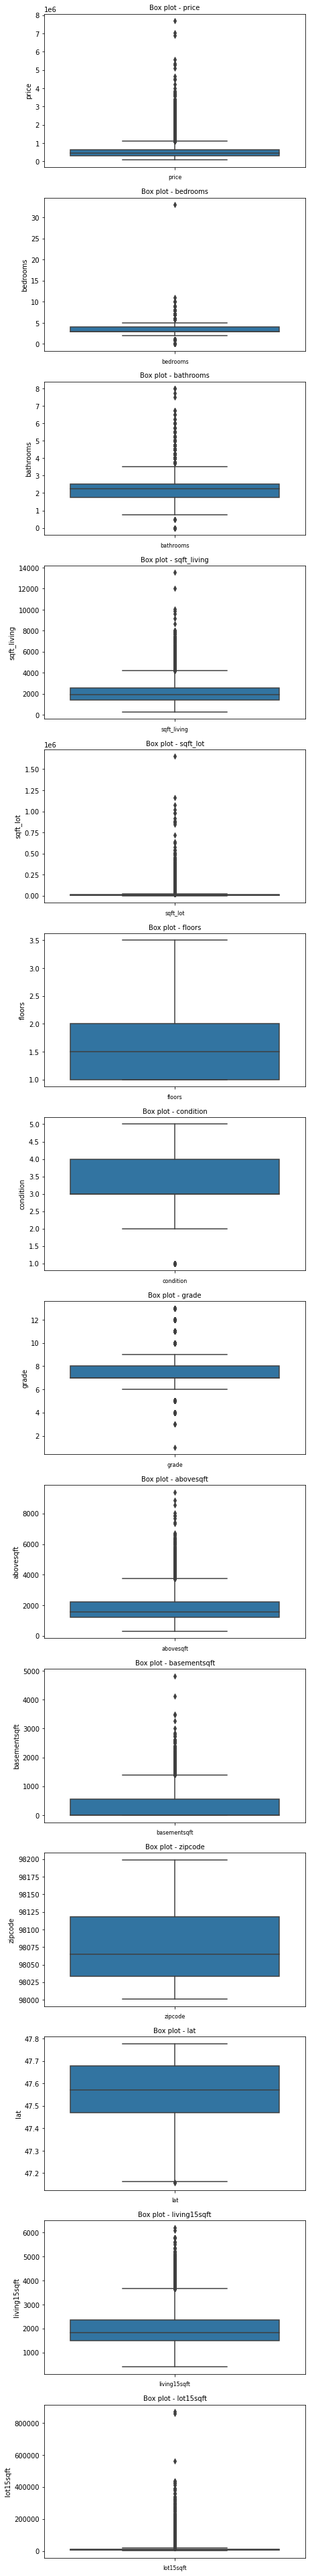

In [378]:

col_names= numerical

fig, ax = plt.subplots(len(col_names), figsize=(7,70))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Dataset[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Percentile Outlier Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

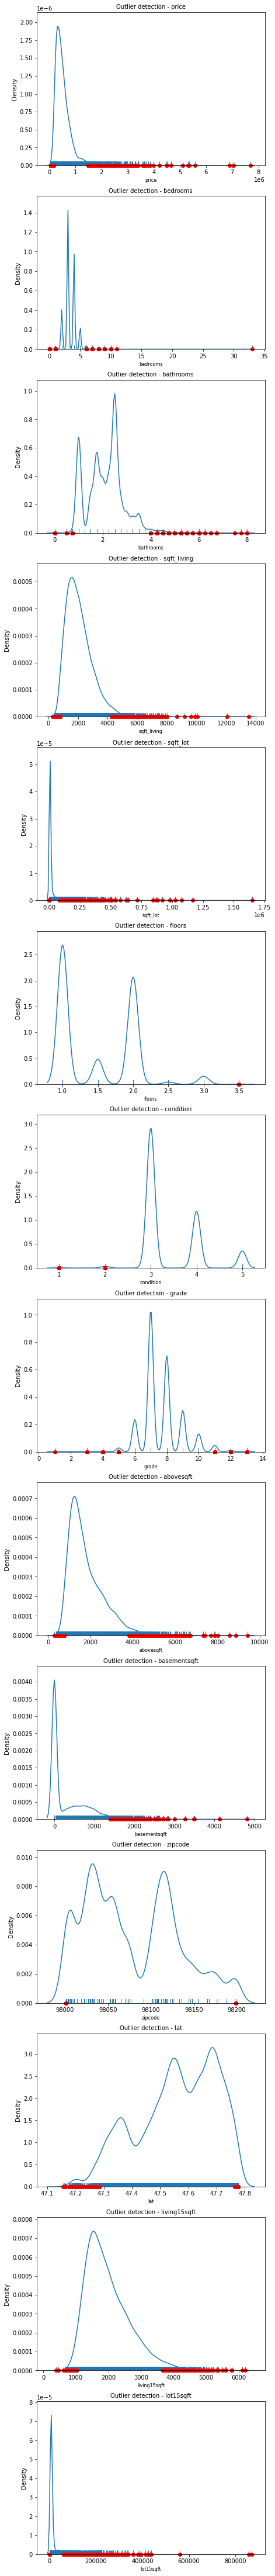

In [379]:
#Values marked with a red dot below in the x-axis of the graph are the ones to be removed
#from the column based on the set threshold percentile (95 in our case), and
#is also the default value when it comes to percentile-based outlier removal.

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names= numerical

fig, ax = plt.subplots(len(col_names), figsize=(7,80))

for i, col_val in enumerate(col_names):
    x = Dataset[col_val]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Removing the outliers

In [380]:
numerical = Dataset._get_numeric_data().columns
categorical = set(Dataset.columns) - set(numerical)
numerical 

lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = Dataset[numerical[i]].quantile(0.25)
        q3 = Dataset[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        Dataset.loc[(Dataset[numerical[i]] <= minimum), numerical[i]] = minimum
        Dataset.loc[(Dataset[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'abovesqft', 'basementsqft', 'zipcode', 'lat',
       'living15sqft', 'lot15sqft'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

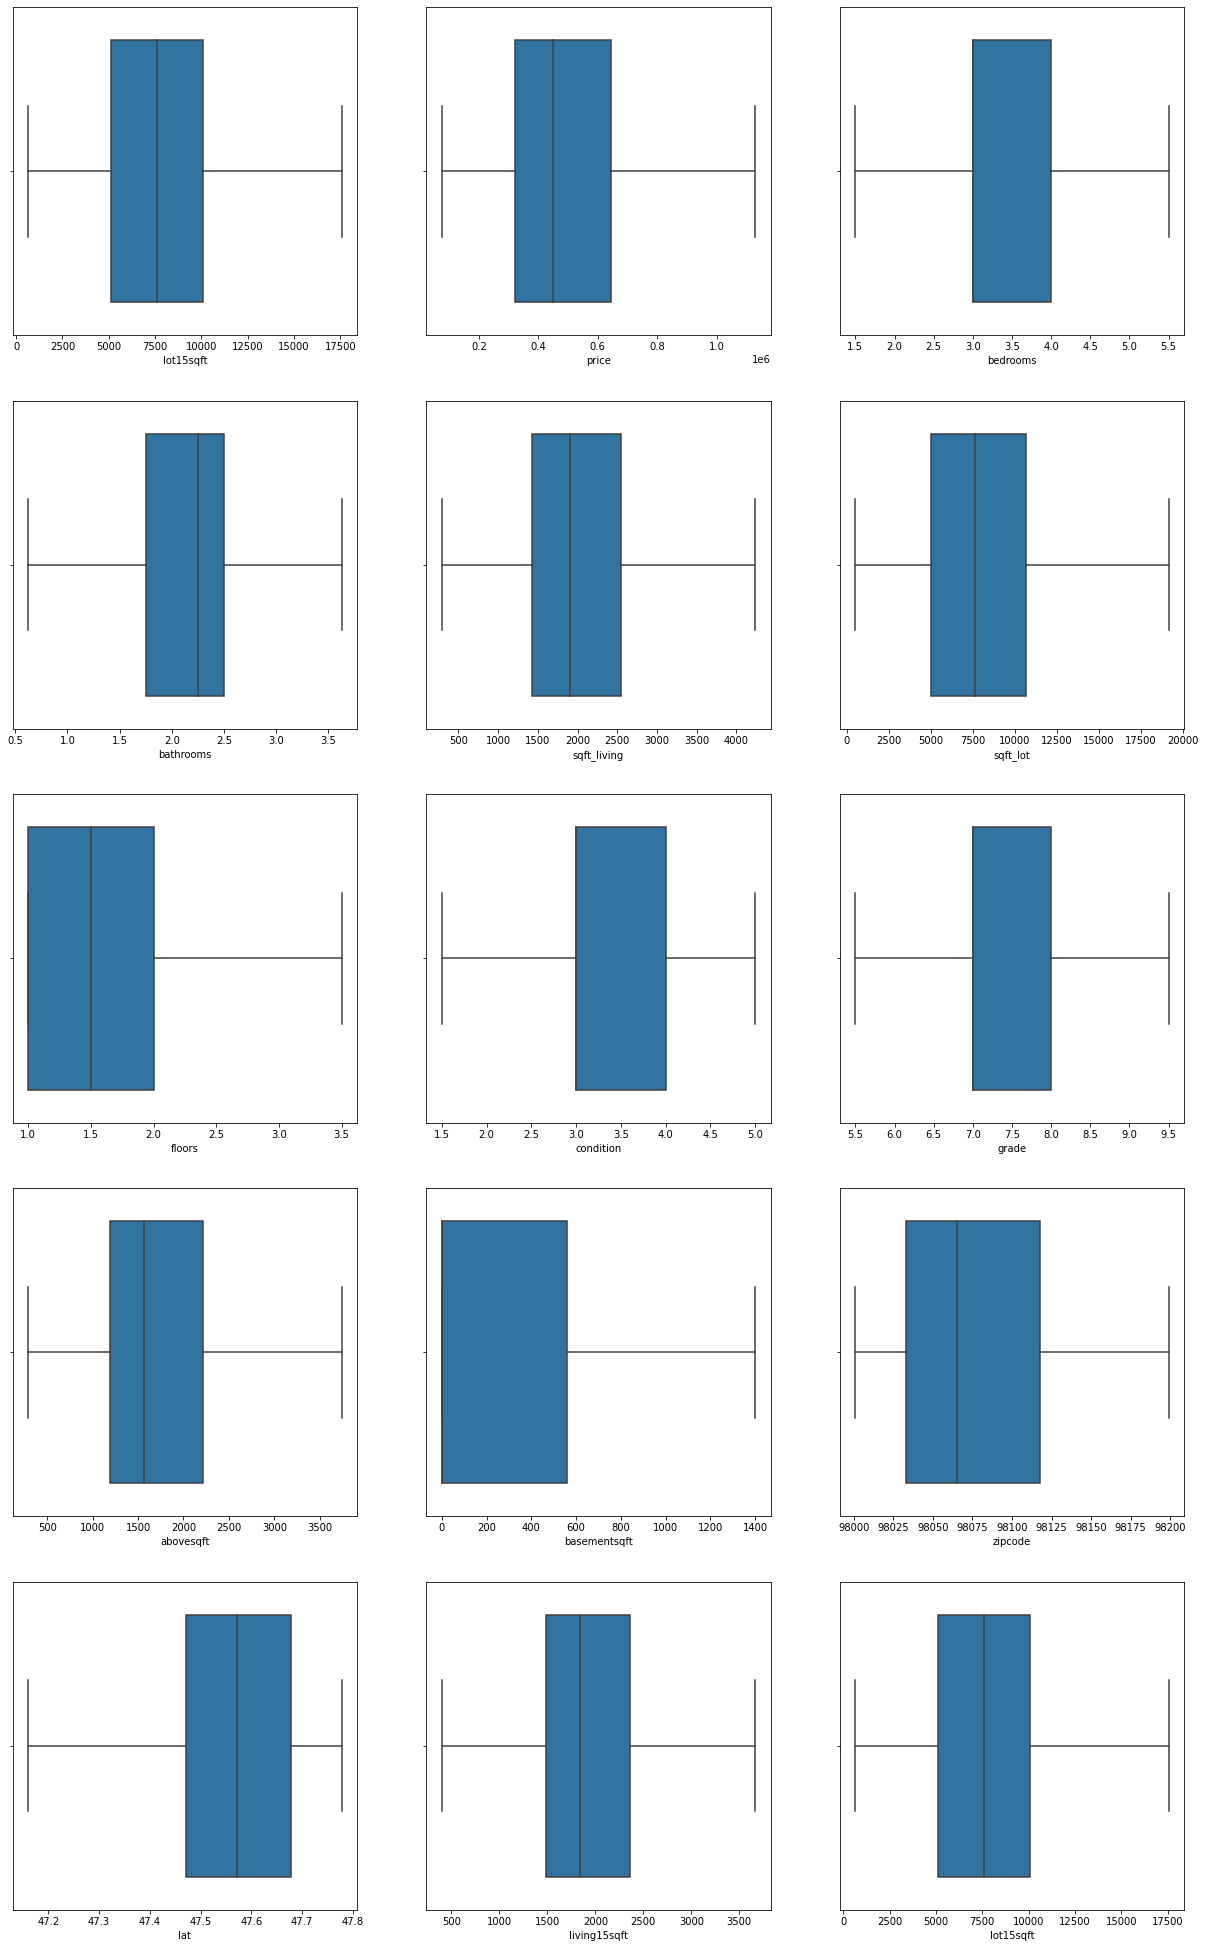

In [381]:
num_of_rows = 5
num_of_cols = 3
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(21,35))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(Dataset[numerical[k-1]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

#Univariate analysis

Freq dist by bedrooms

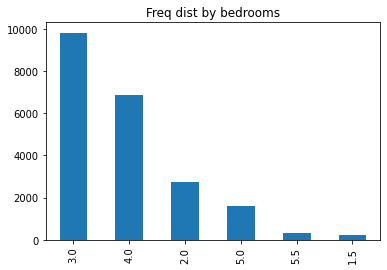

In [382]:
Dataset['bedrooms'].value_counts().plot.bar(title='Freq dist by bedrooms')

Freq dist by bedrooms

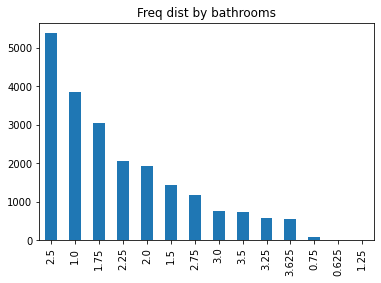

In [383]:
Dataset['bathrooms'].value_counts().plot.bar(title='Freq dist by bathrooms')

Freq dist by floors

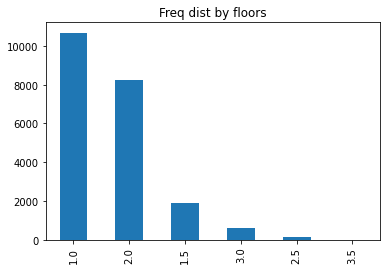

In [384]:
Dataset['floors'].value_counts().plot.bar(title='Freq dist by floors')

Freq dist by condition

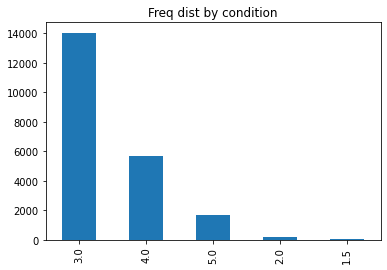

In [385]:
Dataset['condition'].value_counts().plot.bar(title='Freq dist by condition')

#BIVARIATE ANALYSIS

#Crosstab Visualizations

condition by bedrooms

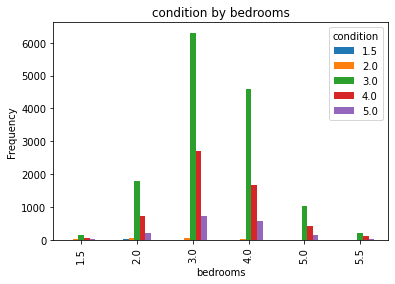

In [386]:

pd.crosstab(Dataset.bedrooms,Dataset.condition).plot(kind='bar')
plt.title('condition by bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.show()

floors by bedrooms

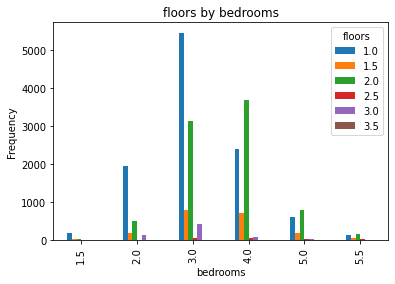

In [387]:
pd.crosstab(Dataset.bedrooms,Dataset.floors).plot(kind='bar')
plt.title('floors by bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.show()

Heat map showing correlation

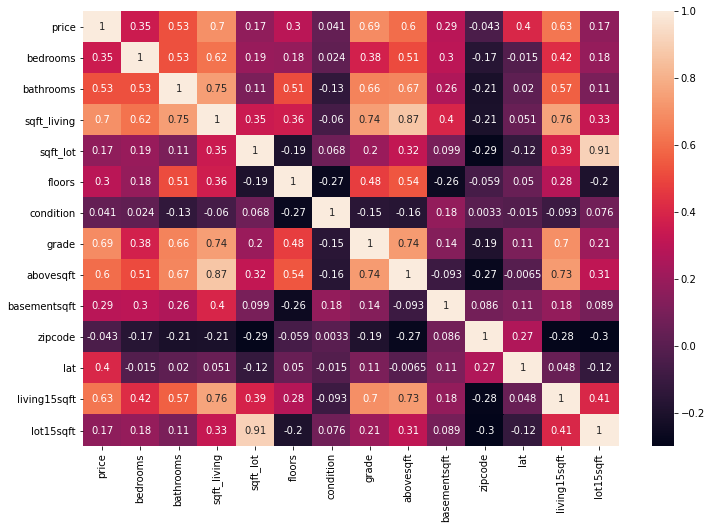

In [388]:
# Heat map showing correlation

plt.figure(figsize=(12, 8))

dfcorr =Dataset.corr()
sns.heatmap(dfcorr, 
            xticklabels = dfcorr.columns.values,
            yticklabels = dfcorr.columns.values,
            annot = True);

#Principal Component Analysis (PCA)

****************************************************************************************************

 Explained variance using explained_variance_ration_ attribute 
 
 [0.37901308 0.16695726 0.11838915 0.08142807 0.06266425 0.05133331
 0.04450961 0.0323156  0.02005916 0.01925665] 


 ****************************************************************************************************


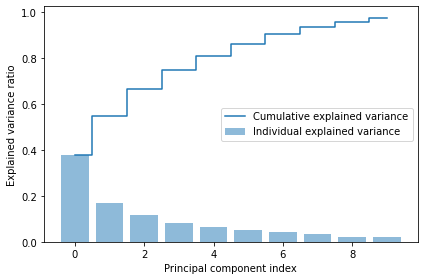

In [389]:
#Distributing the dataset into two components X and Y


x = Dataset.drop('price',1)
y = Dataset['price']

# Splitting the X and Y into Training set and Testing set

from sklearn.model_selection import train_test_split
  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Feature Scaling by fitting the data to a Standard scale.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA
  
pca_rain = PCA(n_components =10)
  
x_train = pca_rain.fit_transform(x_train)
x_test = pca_rain.transform(x_test)

#Explained_variance
explained_variance = pca_rain.explained_variance_ratio_
#explained_variance=pd.DataFrame(explained_variance)
explained_variance
print('*'*100)
print('\n Explained variance using explained_variance_ration_ attribute','\n','\n',explained_variance,'\n')
print('\n','*'*100) 
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = explained_variance
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


#Feature Importance
The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance)


 ****************************************************************************************************
FEATURE IMPORTANCE COEFFICIENTS 
 [0.00597202 0.00885471 0.15765158 0.01817324 0.00330143 0.0093466
 0.39475239 0.01855845 0.00662162 0.04506634 0.2774789  0.03609629
 0.01812645]

 ****************************************************************************************************
CHART FOR FEATURE IMPORTANCE VIA RANDOM FOREST REGRESSOR

 ****************************************************************************************************


<BarContainer object of 13 artists>

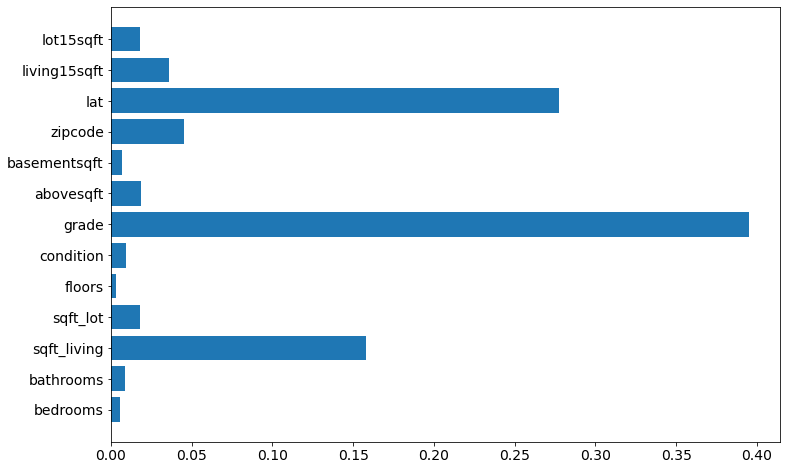

In [390]:
#Let’s find the most important features:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
#Load the data set and split for training and testing.

X2 = Dataset.drop('price',1)
y2 = Dataset['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=12)

#Fit the Random Forest Regressor with 100 Decision Trees:

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X2_train, y2_train)
print('\n','*'*100)
print('FEATURE IMPORTANCE COEFFICIENTS','\n',rf.feature_importances_)
print('\n','*'*100)
print('CHART FOR FEATURE IMPORTANCE VIA RANDOM FOREST REGRESSOR')
print('\n','*'*100)
#Let’s plot the importances (chart will be easier to interpret than values).

plt.barh(list(X2.columns), rf.feature_importances_)

#**Multiple Linear Regression**
Which is our Baseline Model.

In [392]:

# importing linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

# for cross validation

from sklearn.model_selection import train_test_split

X = Dataset.drop('price',1)
Y = Dataset['price']

x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size =0.3)

# training a linear regression model on train

lreg.fit(x_train,y_train)

# predicting on cv

pred_cv = lreg.predict(x_cv)
#print(pred_cv)
# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

#print(mse)
## calculating coefficients

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

# evaluation using r-square

R_square= lreg.score(x_cv,y_cv)
print('\n','*'*100)
print('Linear Regression R_square:',R_square*100,'%')
print('\n','*'*100)


 ****************************************************************************************************
Linear Regression R_square: 69.15180994415752 %

 ****************************************************************************************************


In this case, R² is 69.15%, meaning, 69.15% of variance in prices is explained Thus we have 69.15% information to make an accurate prediction on prices.

#Residual plot

Text(0.5, 1.0, 'Residual plot')

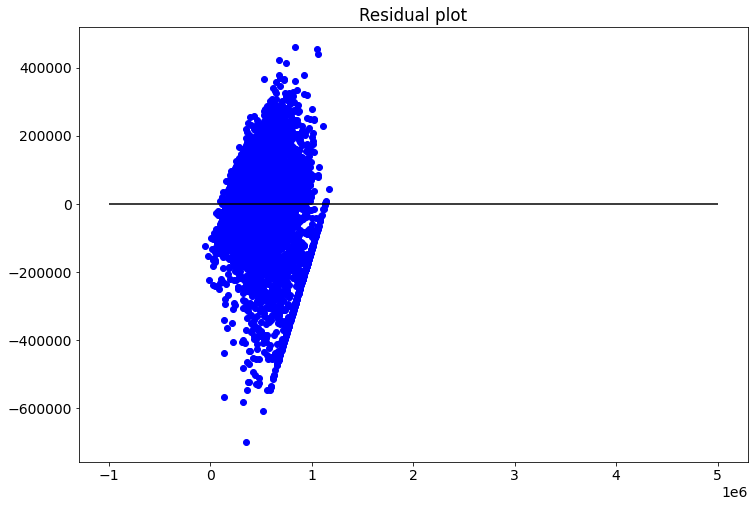

In [393]:
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')

plt.hlines(y=0, xmin= -1000000, xmax=5000000)

plt.title('Residual plot')



This shape indicates **Heteroskedasticity**. The presence of non-constant variance in the error terms results in heteroskedasticity. We can clearly see that the variance of error terms(residuals) is not constant. Generally, non-constant variance arises in presence of outliers or extreme leverage values. These values get too much weight, thereby disproportionately influencing the model’s performance. 

#Regularization

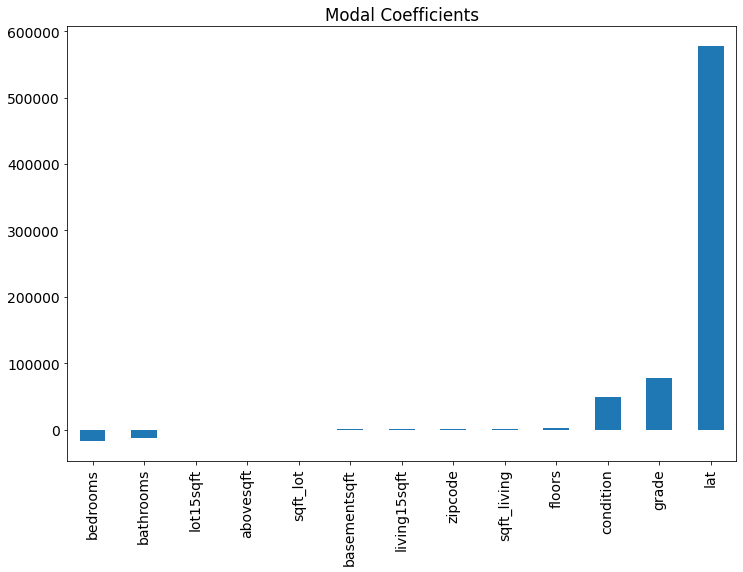

In [394]:
#checking the magnitude of coefficients

predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In regularization, what we do is keep the same number of features, but reduce the magnitude of the coefficients j.

As observed coefficients for **condition**, **grade** and **Lat** are much higher as compared to rest of the coefficients. Therefore the house price would be more driven by these two features.

***However one can reduce the magnitude of coefficients in the model. Via other different types of regression techniques which uses regularization to overcome this problem***

There are three regularization parts they include;

>* L1 Regularization, also known as Lasso Regression.

>* L2 Regularization, also know as Ridge regression.

>* The L1/L2 Regularization, also known as Elastic Net Regression.



# **1. Ridge Regression**




Ridge Regression with α = 0.5

The hyperparameter α, lets us control how much we penalize the coefficients, with higher values of creating simpler modelers. 

In [395]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse 

R_square_ridge= ridgeReg.score(x_cv,y_cv)

print('\n','*'*100)
print('R_square:',R_square_ridge*100,'%')
print('\n','*'*100)


 ****************************************************************************************************
R_square: 68.9822598290236 %

 ****************************************************************************************************


**Note that when the coefficients at lambda equal to zero (x = 0) are the same with the OLS coefficients.**
Thus, we needed to iterate a series of lambda values to find the best lambda.

Hence an OLS model with some bias is better at prediction than the pure OLS model, we call this modified OLS model as the ridge regression model

The optimal alpha value is: 1e-05


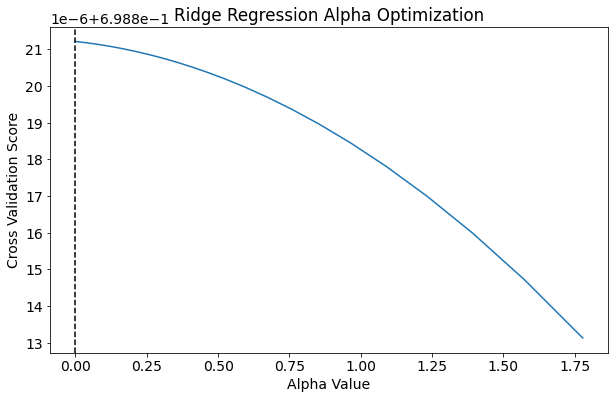

In [396]:
from sklearn.model_selection import GridSearchCV

# Create an array of alpha values to test
alphas = np.logspace(-5, 0.25, 100,base=10)

# Create a Ridge model instance
ridge = Ridge(random_state=0, max_iter=10000,alpha=alphas)


# Create dictionary key,value pair of alpha values
tuned_parameters = [{'alpha': alphas}]

# Specify number of folds for cross_validation
n_folds = 10

# Create grid search instance using desired variables
clf_ridge = GridSearchCV(ridge, tuned_parameters, cv=5, refit=False)
clf_ridge.fit(x_train, y_train)
ridge_scores = clf_ridge.cv_results_['mean_test_score']

# Plot the Figure
plt.figure().set_size_inches(10,6)
plt.plot(alphas, ridge_scores)
plt.xlabel('Alpha Value')
plt.ylabel('Cross Validation Score')
plt.title('Ridge Regression Alpha Optimization')
plt.axvline(clf_ridge.best_params_['alpha'], color='black', linestyle='--')
print(f'The optimal alpha value is: {clf_ridge.best_params_["alpha"]}')

**Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model.**


**Where Ridge Regression with α =1e-05**

In [398]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg_opt = Ridge(alpha= 1e-05, normalize=True)

ridgeReg_opt.fit(x_train,y_train)

pred_opt = ridgeReg_opt.predict(x_cv)
#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse 
## calculating score 

R_square_ridge_opt=ridgeReg_opt.score(x_cv,y_cv) 

print('\n','*'*100)
print('OPtimized Ridge R_square:',R_square_ridge_opt*100,'%')
print('\n','*'*100)


 ****************************************************************************************************
OPtimized Ridge R_square: 69.15176693565532 %

 ****************************************************************************************************


#checking the magnitude of coefficients under **Ridge Regression**

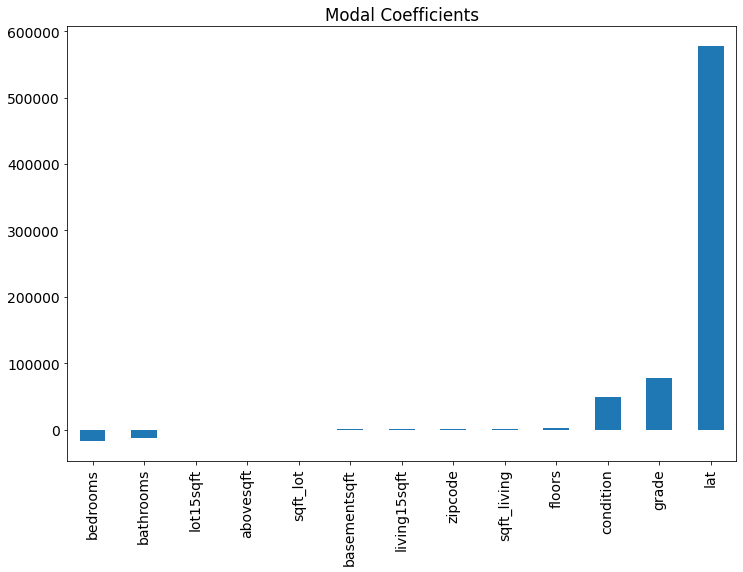

In [399]:
#checking the magnitude of coefficients

predictors = x_train.columns

coef = Series(ridgeReg_opt.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

As observed after  Ridge Regression the coefficients for bedrooms, floors,condition,bathrooms and grade are much higher as compared to rest of the coefficients. Therefore the house price would be more driven by these two features.

**Important Points on Ridge Regression:**

* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
* It reduces the model complexity by coefficient shrinkage.

# **2. Lasso Regression**


LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge, but it it automatically does feature selection.

In [403]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=1, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

mse_lasso = np.mean((pred_cv - y_cv)**2)

mse_lasso

R_square_lasso=lassoReg.score(x_cv,y_cv)

print('\n','*'*100)
print('Lasso R_square:',R_square_lasso*100,'%')
print('\n','*'*100)



 ****************************************************************************************************
Lasso R_square: 69.15173954919254 %

 ****************************************************************************************************


**Just like the Ridge we needed to iterate a series of lambda values to find the best lambda.**

The optimal alpha value is :1.6297508346206444


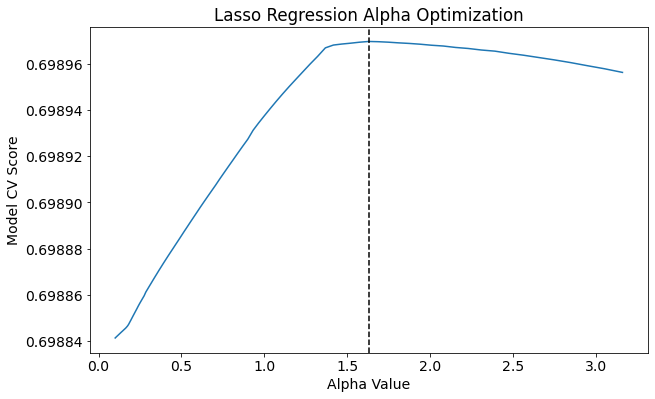

In [404]:
#Finding Optimized Lasso Alpha Value

from sklearn.model_selection import GridSearchCV

# Create an array of alpha values to test
alpha_lasso = np.logspace(-1, 0.5, 100,base=10)

# Create dictionary key,value pair of alpha values
tuned_parameters = [{'alpha': alpha_lasso}]

# Specify number of folds for cross_validation
n_folds = 5

# Create grid search instance using desired variables
clf_lasso = GridSearchCV(lassoReg, tuned_parameters, cv=5, refit=True)
clf_lasso.fit(x_train, y_train)
lasso_scores = clf_lasso.cv_results_['mean_test_score']

# Plot the results
plt.figure().set_size_inches(10, 6)
plt.plot(alpha_lasso, lasso_scores)
plt.xlabel('Alpha Value')
plt.ylabel('Model CV Score')
plt.title('Lasso Regression Alpha Optimization')
plt.axvline(clf_lasso.best_params_['alpha'], color='black', linestyle='--')
print(f'The optimal alpha value is :{clf_lasso.best_params_["alpha"]}')

**Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model.**


**Where Lasso Regression with α =1.6297508346206444**

In [405]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=1.6297508346206444, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

mse_lasso = np.mean((pred_cv - y_cv)**2)

mse_lasso

R_square_lasso_opt=lassoReg.score(x_cv,y_cv)


print('\n','*'*100)
print('Lasso R_square:',R_square_lasso_opt*100,'%')
#print('Lasso Mean Squared Error:',mse_lasso)
print('\n','*'*100)


 ****************************************************************************************************
Lasso R_square: 69.15201539458857 %

 ****************************************************************************************************


#checking the magnitude of coefficients under **Lasso Regression**

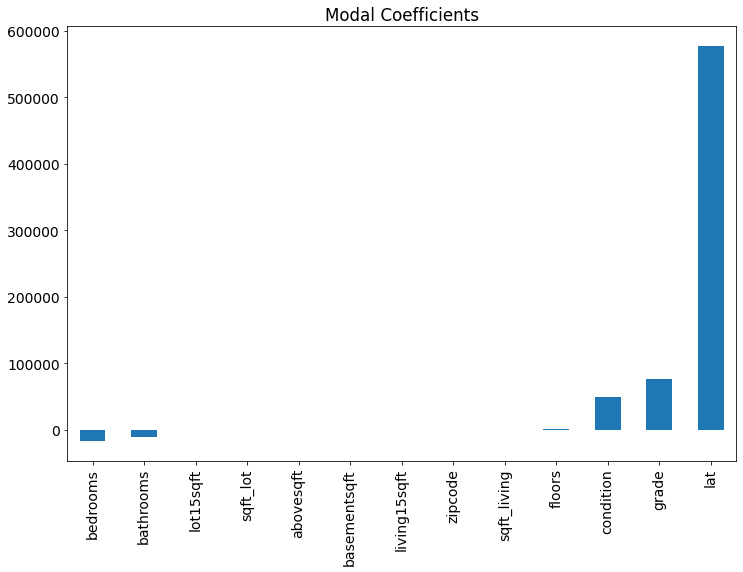

In [406]:
#checking the magnitude of coefficients

predictors = x_train.columns

coef = Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

# **3. Elastic Net Regression**

Elastic net is basically a combination of both Ridge and Lasso in tuning the parameters.

Elastic net is the same as lasso when α = 1 and as α shrinks toward 0, elastic net approaches ridge regression. For other values of α, the penalty term Pα(β) interpolates between the L1 norm of β and the squared L2 norm of β.

In [410]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating mse

ElasticNet_MSE = np.mean((pred_cv - y_cv)**2)

ElasticNet_MSE 

ENreg.score(x_cv,y_cv)


print('\n','*'*100)
print('ElasticNet R_square:',ENreg.score(x_cv,y_cv)*100,'%')
print('\n','*'*100)





 ****************************************************************************************************
ElasticNet R_square: 57.652131764147406 %

 ****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132977928532436.89, tolerance: 95273757453.81319
  positive)


Just like the like ridge and lasso regression we need to iterate a series of lambda values to find the best lambda

In [411]:
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# create our grid.

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

print('\n','*'*100)
print('The best hyperparameters:',search.best_params_)
print('\n','*'*100)



 ****************************************************************************************************
The best hyperparameters: {'alpha': 1e-05, 'l1_ratio': 0.8}

 ****************************************************************************************************


 For optimization, we will set our hyperparameters to the recommended values and run on the data.

In [412]:
ENreg_opt= ElasticNet(alpha=1e-05, l1_ratio=0.8, normalize=True)

ENreg_opt.fit(x_train,y_train)

pred_cv = ENreg_opt.predict(x_cv)

#calculating mse

ElasticNet_MSE_opt = np.mean((pred_cv - y_cv)**2)

ElasticNet_MSE_opt 

R_square_ElasticNet_opt=ENreg.score(x_cv,y_cv)


print('\n','*'*100)
print('OPtimized ElasticNet R_square:',R_square_ElasticNet_opt*100,'%')
print('\n','*'*100)


 ****************************************************************************************************
OPtimized ElasticNet R_square: 57.652131764147406 %

 ****************************************************************************************************


**checking the magnitude of coefficients under Elastic Net Regression**

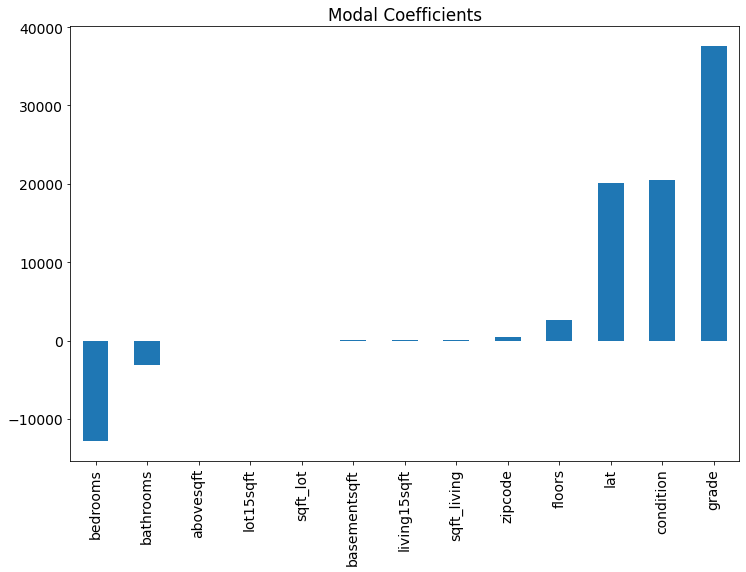

In [413]:
#checking the magnitude of coefficients

predictors = x_train.columns

coef = Series(ENreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#**Quantile Regression**

Quantile regression is an expansion to least absolute deviations, which tries to minimize the sum of absolute values of the residuals.
It predicts a quantile (or percentile) for given independent variables. It a favorable regression technique when data has outliers, high skewness, and heteroscedasticity.  It is a valuable tool for cases where the assumptions of Linear regression are not met and for cases where interest is in the quantiles. 

In [415]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

quantiles = [0.05, 0.25, 0.50, 0.75, 0.95] 

for qt in quantiles: 
    model = smf.quantreg('price ~ bedrooms +bathrooms+sqft_living + sqft_lot + floors+condition + grade + abovesqft + basementsqft + zipcode + lat + living15sqft + lot15sqft', Dataset).fit(q=qt)
    print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3363
Model:                       QuantReg   Bandwidth:                   2.298e+04
Method:                 Least Squares   Sparsity:                    4.176e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21613
Time:                        09:41:56   Df Residuals:                    21599
                                        Df Model:                           13
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -214.4934      2.093   -102.495      0.000    -218.595    -210.392
bedrooms     -1.211e+04   1193.089    -10.149      0.000   -1.44e+04   -9769.543
bathrooms     1.302e+04   1810.306      7.193      0.000    9472.930    1.66e+04
sqft_living    149.6389      4.746     31.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4132
Model:                       QuantReg   Bandwidth:                   1.893e+04
Method:                 Least Squares   Sparsity:                    2.958e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21613
Time:                        09:42:00   Df Residuals:                    21599
                                        Df Model:                           13
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       29.1633      2.189     13.321      0.000      24.872      33.455
bedrooms     -1.911e+04   1310.275    -14.582      0.000   -2.17e+04   -1.65e+04
bathrooms    -3851.5949   2011.564     -1.915      0.056   -7794.408      91.218
sqft_living     80.6138      7.014     11.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4583
Model:                       QuantReg   Bandwidth:                   2.088e+04
Method:                 Least Squares   Sparsity:                    2.826e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21613
Time:                        09:42:04   Df Residuals:                    21599
                                        Df Model:                           13
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1114.8174      2.024   -550.846      0.000   -1118.784   -1110.851
bedrooms      -2.55e+04   1480.471    -17.225      0.000   -2.84e+04   -2.26e+04
bathrooms    -1.881e+04   2275.129     -8.269      0.000   -2.33e+04   -1.44e+04
sqft_living    160.9052     10.344     15.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4975
Model:                       QuantReg   Bandwidth:                   1.922e+04
Method:                 Least Squares   Sparsity:                    4.103e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21613
Time:                        09:42:09   Df Residuals:                    21599
                                        Df Model:                           13
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1973.6045      2.220   -888.860      0.000   -1977.957   -1969.252
bedrooms      -2.52e+04   1955.448    -12.885      0.000    -2.9e+04   -2.14e+04
bathrooms    -3.378e+04   3014.008    -11.208      0.000   -3.97e+04   -2.79e+04
sqft_living    192.2383     16.407     11.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


**Quantile Regression: price ~Bedrooms**

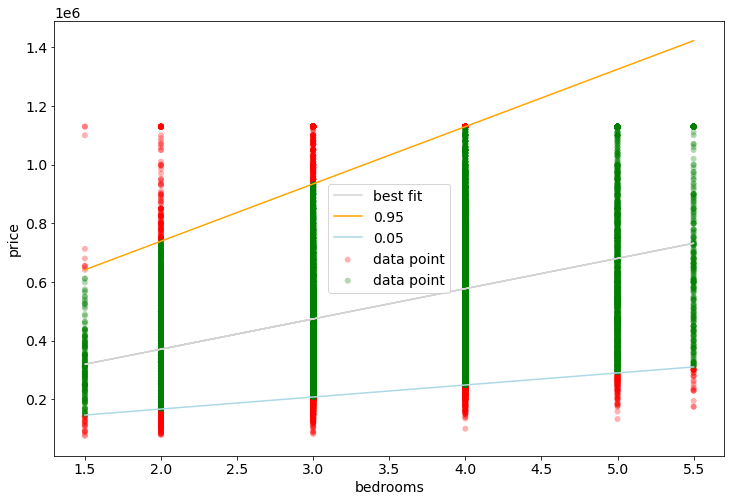

In [420]:
model = smf.quantreg('price ~bedrooms', Dataset)
quantiles = [0.05, 0.95]
fits = [model.fit(q=q) for q in quantiles]
figure, axes = plt.subplots()
x = Dataset['bedrooms']
y = Dataset['price']

fit = np.polyfit(x, y, deg=1)
_x = np.linspace(x.min(), x.max(), num=len(y))

# fit lines
_y_005 = fits[0].params['bedrooms'] * _x + fits[0].params['Intercept']
_y_095 = fits[1].params['bedrooms'] * _x + fits[1].params['Intercept']

# start and end coordinates of fit lines
p = np.column_stack((x, y))
a = np.array([_x[0], _y_005[0]]) #first point of 0.05 quantile fit line
b = np.array([_x[-1], _y_005[-1]]) #last point of 0.05 quantile fit line

a_ = np.array([_x[0], _y_095[0]])
b_ = np.array([_x[-1], _y_095[-1]])

#mask based on if coordinates are above 0.95 or below 0.05 quantile fitlines using cross product
mask = lambda p, a, b, a_, b_: (np.cross(p-a, b-a) > 0) | (np.cross(p-a_, b_-a_) < 0)
mask = mask(p, a, b, a_, b_)

axes.scatter(x[mask], Dataset['price'][mask], facecolor='r', edgecolor='none', alpha=0.3, label='data point')
axes.scatter(x[~mask], Dataset['price'][~mask], facecolor='g', edgecolor='none', alpha=0.3, label='data point')

axes.plot(x, fit[0] * x + fit[1], label='best fit', c='lightgrey')
axes.plot(_x, _y_095, label=quantiles[1], c='orange')
axes.plot(_x, _y_005, label=quantiles[0], c='lightblue')

axes.legend()
axes.set_xlabel('bedrooms')
axes.set_ylabel('price')

plt.show()

As observed for houses which have more than four bedrooms thier prices at 95% quatile is not influenced by the number of bedrooms.

**Quantile Regression: price ~grade**

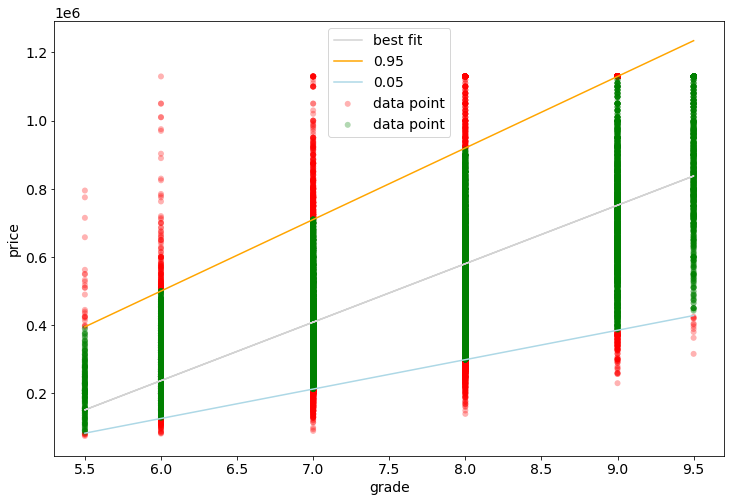

In [422]:
model = smf.quantreg('price ~grade', Dataset)
quantiles = [0.05, 0.95]
fits = [model.fit(q=q) for q in quantiles]
figure, axes = plt.subplots()
x = Dataset['grade']
y = Dataset['price']

fit = np.polyfit(x, y, deg=1)
_x = np.linspace(x.min(), x.max(), num=len(y))

# fit lines
_y_005 = fits[0].params['grade'] * _x + fits[0].params['Intercept']
_y_095 = fits[1].params['grade'] * _x + fits[1].params['Intercept']

# start and end coordinates of fit lines
p = np.column_stack((x, y))
a = np.array([_x[0], _y_005[0]]) #first point of 0.05 quantile fit line
b = np.array([_x[-1], _y_005[-1]]) #last point of 0.05 quantile fit line

a_ = np.array([_x[0], _y_095[0]])
b_ = np.array([_x[-1], _y_095[-1]])

#mask based on if coordinates are above 0.95 or below 0.05 quantile fitlines using cross product
mask = lambda p, a, b, a_, b_: (np.cross(p-a, b-a) > 0) | (np.cross(p-a_, b_-a_) < 0)
mask = mask(p, a, b, a_, b_)

axes.scatter(x[mask], Dataset['price'][mask], facecolor='r', edgecolor='none', alpha=0.3, label='data point')
axes.scatter(x[~mask], Dataset['price'][~mask], facecolor='g', edgecolor='none', alpha=0.3, label='data point')

axes.plot(x, fit[0] * x + fit[1], label='best fit', c='lightgrey')
axes.plot(_x, _y_095, label=quantiles[1], c='orange')
axes.plot(_x, _y_005, label=quantiles[0], c='lightblue')

axes.legend()
axes.set_xlabel('grade')
axes.set_ylabel('price')

plt.show()

As observed above grade has more influce on the higher pricced properties or houses.

#Conclusion

Of the five models in this study the Lasso Regression and Ridge regression were the best with  R-squred of about 69%
The  Elastic Net Regression performed poorly with R-Squared of about 57%.

#Challenge the solution.

The models performance wasn't good there is need to improved thier outcome through machine learning techniques.

#Follow up questions.

Do we need more predictor variables to carry out the task?

* Probally yes be couse there are more factors influence house pricing.

Did the study adopt the correct regression technique?

* OPen for further research.